In [18]:
import pandas as pd
import tweepy

In [19]:
%run ./keys.ipynb

In [20]:
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [29]:
# Analyse data for invididual user

cursor = tweepy.Cursor(api.user_timeline, id='MacroAlf', tweet_mode='extended').items(1)

for i in cursor:
    print(dir(i))

Unexpected parameter: id


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']


In [51]:
# Analyse data for key word search

#cursor = tweepy.Cursor(api.Search, q='recession', tweet_mode='extended').items(1)

#for i in cursor:
 #   print(dir(i))

In [31]:
number_of_tweets = 200
tweets = []
likes = []
time = []

for i in tweepy.Cursor(api.user_timeline,id='MacroAlf',tweet_mode='extended').items(number_of_tweets):
    tweets.append(i.full_text)
    time.append(i.created_at)

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


In [32]:
data = pd.DataFrame({'tweets':tweets,'time':time})

In [33]:
data

,tweets,time
0,ECB’s Knot doing a Bullard move and bringing t...,2022-05-17 10:34:09+00:00
1,@MrBlonde_macro @PauloMacro “40% chance of a r...,2022-05-17 07:40:38+00:00
2,@jens34232153 Impossible. Introduced that on F...,2022-05-17 05:52:43+00:00
3,@string223 Good old times,2022-05-17 05:50:59+00:00
4,@Jimmyjude13 Ah the good old picking up Pennie...,2022-05-17 05:45:35+00:00
...,...,...
195,@EquityAlphaHunt Thank you,2022-05-09 07:49:17+00:00
196,@youngfinness @LukeGromen Ahah this is the tra...,2022-05-09 06:45:47+00:00
197,"@AndreasSteno Yep, buying bonds here works if ...",2022-05-09 06:37:25+00:00
198,"''Look Alf, defensive outperforming cyclical e...",2022-05-08 21:17:00+00:00


In [39]:
# Gets rid of Retweeted data

data = data[~data.tweets.str.contains('@')]

In [40]:
data = data.reset_index(drop=True)

In [41]:
data

,tweets,time
0,ECB’s Knot doing a Bullard move and bringing t...,2022-05-17 10:34:09+00:00
1,"As our demographics keep worsening, some tailw...",2022-05-16 22:23:00+00:00
2,What the heck did you talk about on FinTwit in...,2022-05-16 21:37:00+00:00
3,-25.000.000.000.000 USD.\n\nThat’s roughly the...,2022-05-16 20:31:06+00:00
4,Find me one time the stock market has bottomed...,2022-05-16 18:33:55+00:00
...,...,...
69,...for risk assets.\n\nA highly leveraged econ...,2022-05-09 12:42:26+00:00
70,Long-term risk-free real yields move higher fo...,2022-05-09 12:42:26+00:00
71,The moves in US real rates have been big!\n\nT...,2022-05-09 12:42:25+00:00
72,Just out: ECB staff asked for a pay rise in li...,2022-05-09 10:40:45+00:00


In [42]:
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns

In [43]:
list_of_sentences = [sentence for sentence in data.tweets]

lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [44]:
lines = [re.sub(r'[^A-Za-z0-9]+','',x) for x in lines]

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)


In [45]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['ecb',
 'knot',
 'do',
 'a',
 'bullard',
 'move',
 'and',
 'bring',
 'the',
 'heat',
 'as',
 'highlight',
 'alreadi',
 'the',
 'idea',
 'is',
 'to',
 'talk',
 'the',
 'eur',
 'up',
 'but',
 'this',
 'hawkish',
 'move',
 'is',
 'go',
 'to',
 'expos',
 'the',
 'vulner',
 'of',
 'italian',
 'bond',
 'headlin',
 'of',
 'anoth',
 'italian',
 'crisi',
 'come',
 'soon',
 'to',
 'a',
 'place',
 'near',
 'you',
 'as',
 'our',
 'demograph',
 'keep',
 'worsen',
 'some',
 'tailwind',
 'for',
 'longterm',
 'structur',
 'gdp',
 'growth',
 'could',
 'come',
 'from',
 'global',
 'robot',
 'over',
 'the',
 'next',
 '20',
 'year',
 'the',
 'industri',
 'robot',
 'popul',
 'is',
 'project',
 'to',
 'increas',
 'by',
 '700',
 'httpstcow4dznv4qlz',
 'what',
 'the',
 'heck',
 'did',
 'you',
 'talk',
 'about',
 'on',
 'fintwit',
 'in',
 '2017',
 'when',
 'the',
 'realiz',
 'spx',
 'volatil',
 'was',
 'lt10',
 'and',
 'noth',
 'was',
 'happen',
 'in',
 'global',
 'macro',
 'genuin',
 'curious',
 '25000000000

In [46]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['ecb',
 'knot',
 'bullard',
 'bring',
 'heat',
 'highlight',
 'alreadi',
 'idea',
 'talk',
 'eur',
 'hawkish',
 'expos',
 'vulner',
 'italian',
 'bond',
 'headlin',
 'anoth',
 'italian',
 'crisi',
 'come',
 'soon',
 'place',
 'near',
 'demograph',
 'worsen',
 'tailwind',
 'longterm',
 'structur',
 'gdp',
 'growth',
 'come',
 'global',
 'robot',
 '20',
 'year',
 'industri',
 'robot',
 'popul',
 'project',
 'increas',
 '700',
 'httpstcow4dznv4qlz',
 'heck',
 'talk',
 'fintwit',
 '2017',
 'realiz',
 'spx',
 'volatil',
 'lt10',
 'noth',
 'happen',
 'global',
 'macro',
 'genuin',
 'curious',
 '25000000000000',
 'usd',
 'rough',
 'financi',
 'wealth',
 'wipe',
 'bond',
 'credit',
 'equiti',
 'crypto',
 'market',
 'sinc',
 'peak',
 '2021',
 'case',
 'wonder',
 'find',
 'time',
 'stock',
 'market',
 'signific',
 'declin',
 'fed',
 'didnt',
 'sharpli',
 'pivot',
 'dovish',
 'growth',
 'didnt',
 'start',
 'convinc',
 'surpris',
 'upsid',
 'condit',
 'met',
 'today',
 'quit',
 'opposit',
 'actua

In [48]:
data = pd.DataFrame(stem2)

data = data[0].value_counts()

/Users/joethorpe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


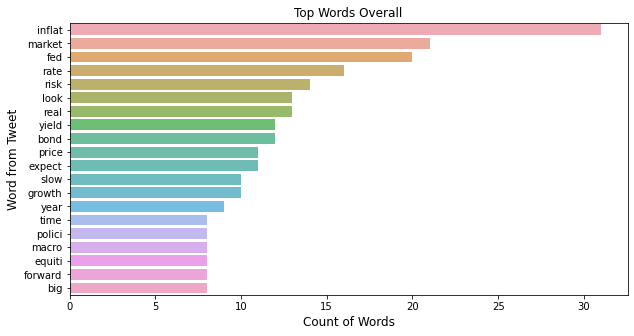

In [50]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

data = data[:20,]
plt.figure(figsize=(10,5))
sns.barplot(data.values, data.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()